<a href="https://colab.research.google.com/github/Yixian-ch/ADS-B/blob/main/Cours/Les_pandas_du_titanic_eleve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice sur Pandas : analysons un grand classique parmi les datasets : les victimes du Titanic

Le dataset peut être trouvé https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

1) Chargez le dataset

In [7]:
import pandas as pd
data = pd.read_csv("sample_data/titanic.csv")

2) Afficher des infos élémentaires sur le dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3) Combien de passagers ont survécu ? combien sont morts ? Donnez la réponse en pourcentage aussi.

In [9]:
survu = data[data["Survived"]==1]
print(len(survu),len(data)-len(survu))

342 549


4) Quel était l'âge moyen des passagers ?

In [10]:
print(data['Age'].mean())

29.69911764705882


5) Listez les passagers qui ont payé le tarif le plus élevé

In [11]:
print(data.sort_values(by="Pclass")[:5])

     PassengerId  Survived  Pclass  \
857          858         1       1   
862          863         1       1   
867          868         0       1   
52            53         1       1   
839          840         1       1   

                                                  Name     Sex   Age  SibSp  \
857                             Daly, Mr. Peter Denis     male  51.0      0   
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  female  48.0      0   
867               Roebling, Mr. Washington Augustus II    male  31.0      0   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
839                               Marechal, Mr. Pierre    male   NaN      0   

     Parch    Ticket     Fare Cabin Embarked  
857      0    113055  26.5500   E17        S  
862      0     17466  25.9292   D17        S  
867      0  PC 17590  50.4958   A24        S  
52       0  PC 17572  76.7292   D33        C  
839      0     11774  29.7000   C47        C  


6) Dessinez un pie chart représentant le genre des passager

([<matplotlib.patches.Wedge at 0x7e7897fc6f60>,
 [Text(-0.4919454315896098, 0.9838646717603559, 'men'),
  Text(0.49194551760179267, -0.9838646287531149, 'women')])

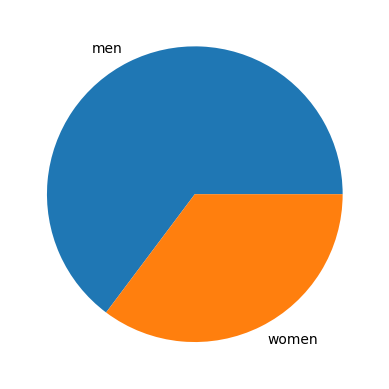

In [12]:
import matplotlib.pyplot as plt
mans = len(data[data["Sex"]=="male"])
women = len(data) - mans

plt.pie([mans,women],labels=["men","women"])

7) Calculer le taux de survie par genre

In [13]:
print(f"men survival rate: {mans/len(data)},women:{1-mans/len(data)}")

men survival rate: 0.6475869809203143,women:0.3524130190796857


8) Trouver la répartition des classes des passagers

In [14]:
c1 = len(data[data["Pclass"]==1])
c2 = len(data[data["Pclass"]==2])
c3 = len(data[data["Pclass"]==3])

print(c1,c2,c3,c1+c2+c3 == len(data))

216 184 491 True


9)Calculer le taux de survie par classe

<BarContainer object of 3 artists>

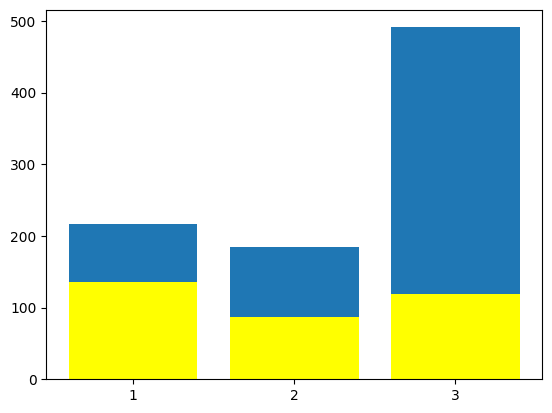

In [22]:
c1_survive = len(data[(data["Pclass"]==1)  & (data["Survived"]==1)])
c2_survive = len(data[(data["Pclass"]==2)  & (data["Survived"]==1)])
c3_survive = len(data[(data["Pclass"]==3)  & (data["Survived"]==1)])

clas = ["1","2","3"]
survive = [c1_survive,c2_survive,c3_survive]
dead = [c1-c1_survive,c2-c2_survive,c3-c3_survive]

plt.bar(clas,survive,label="survive",color="yellow")
plt.bar(clas,dead,bottom=survive,label="dead")


10) quels étaient les 10 prénoms masculins et les 10 prénoms féminins les plus fréquents ?